This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

In [22]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

# Getting started with neural networks: classification and regression

## Classifying newswires: a multiclass classification example

### The Reuters dataset

In this section, you’ll build a model to classify Reuters newswires into $46$ mutually exclusive topics. Because you have many classes, this problem is an instance of **multiclass classification**; and because each data point should be classified into only one category, the problem is more specifically an instance of **single-label, multiclass classification**. If each data point could belong to multiple categories (in this case, topics), you’d be facing a multilabel, multiclass classification problem.

You’ll work with the Reuters dataset, a set of short newswires and their topics, published by Reuters in 1986. It’s a simple, widely used toy dataset for text classification. There are $46$ different topics; some topics are more represented than others, but each topic has at least $10$ examples in the training set.

**Loading the Reuters dataset**

In [4]:
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

C:\tools\miniconda3\envs\dl\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\tools\miniconda3\envs\dl\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [5]:
len(train_data)

8982

In [6]:
len(test_data)

2246

In [7]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

**Decoding newswires back to text**

In [8]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

In [9]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [10]:
train_labels[10]

3

### Preparing the data

**Encoding the input data**

In [11]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

**Encoding the labels**

To vectorize the labels, there are two possibilities: you can cast the label list as an integer tensor, or you can use one-hot encoding. **One-hot encoding** is a widely used format for categorical data, also called categorical encoding.In this case, one-hot encoding of the labels consists of embedding each label as an all-zero vector with a 1 in the place of the label index. Here’s an example:

In [12]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [13]:
y_train.shape

(8982, 46)

In [14]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

### Building your model

**Model definition**

There are two other things you should note about this architecture:

You end the model with a `Dense` layer of size $46$. This means for each input sample, the network will output a $46$-dimensional vector. Each entry in this vector (each dimension) will encode a different output class.

The last layer uses a `softmax` activation. You saw this pattern in the MNIST example. It means the model will output a **probability distribution over the $46$ different output classes**—for every input sample, the model will produce a $46$-dimensional output vector, where `output[i]` is the probability that the sample belongs to class $i$. The $46$ scores will sum to $1$.


In [24]:
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

**Compiling the model**

The best loss function to use in this case is `categorical_crossentropy`. It measures the distance between two probability distributions: here, between the probability distribution output by the model and the true distribution of the labels. By minimizing the distance between these two distributions, you train the model to output something as close as possible to the true labels.

In [25]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [18]:
shuffled_index = np.random.permutation(range(x_train.shape[0]))

x_val = x_train[shuffled_index][:1000]
partial_x_train = x_train[shuffled_index][1000:]
y_val = y_train[shuffled_index][:1000]
partial_y_train = y_train[shuffled_index][1000:]

**Training the model**

In [19]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 24ms/step - loss: 2.6813 - accuracy: 0.5119 - val_loss: 1.7369 - val_accuracy: 0.6430
Epoch 2/20
16/16 [==============================] - 0s 12ms/step - loss: 1.4278 - accuracy: 0.6964 - val_loss: 1.2834 - val_accuracy: 0.7230
Epoch 3/20
16/16 [==============================] - 0s 13ms/step - loss: 1.0427 - accuracy: 0.7740 - val_loss: 1.1270 - val_accuracy: 0.7520
Epoch 4/20
16/16 [==============================] - 0s 11ms/step - loss: 0.8159 - accuracy: 0.8232 - val_loss: 1.0416 - val_accuracy: 0.7700
Epoch 5/20
16/16 [==============================] - 0s 13ms/step - loss: 0.6473 - accuracy: 0.8633 - val_loss: 0.9972 - val_accuracy: 0.7840
Epoch 6/20
16/16 [==============================] - 0s 12ms/step - loss: 0.5137 - accuracy: 0.8920 - val_loss: 0.9388 - val_accuracy: 0.7950
Epoch 7/20
16/16 [==============================] - 0s 12ms/step - loss: 0.4068 - accuracy: 0.9143 - val_loss: 0.9348 - val_accuracy: 0.8010
Epoch 8/20
16

**Plotting the training and validation loss**

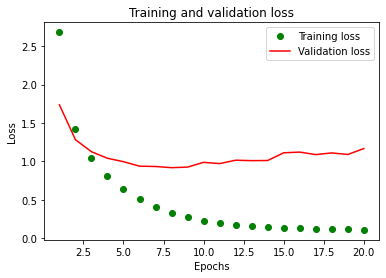

In [26]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "go", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

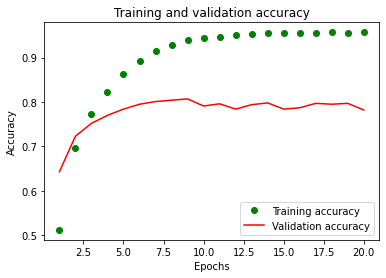

In [27]:
plt.clf()

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "go", label="Training accuracy")
plt.plot(epochs, val_acc, "r", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [28]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test, return_dict=True)

Epoch 1/9
18/18 [==============================] - 1s 9ms/step - loss: 2.4859 - accuracy: 0.5603
Epoch 2/9
18/18 [==============================] - 0s 10ms/step - loss: 1.3175 - accuracy: 0.7196
Epoch 3/9
18/18 [==============================] - 0s 11ms/step - loss: 0.9841 - accuracy: 0.7859
Epoch 4/9
18/18 [==============================] - 0s 9ms/step - loss: 0.7763 - accuracy: 0.8334
Epoch 5/9
18/18 [==============================] - 0s 10ms/step - loss: 0.6118 - accuracy: 0.8732
Epoch 6/9
18/18 [==============================] - 0s 9ms/step - loss: 0.4904 - accuracy: 0.8988
Epoch 7/9
18/18 [==============================] - 0s 9ms/step - loss: 0.3926 - accuracy: 0.9171
Epoch 8/9
18/18 [==============================] - 0s 9ms/step - loss: 0.3210 - accuracy: 0.9309
Epoch 9/9
71/71 [==============================] - 2s 32ms/step - loss: 0.9537 - accuracy: 0.7921


In [29]:
results

{'loss': 0.9536892771720886, 'accuracy': 0.7920747995376587}

This approach reaches an accuracy of ~$80\%$. With a balanced binary classification problem, the accuracy reached by a purely random classifier would be $50\%$. But in this case, we have $46$ classes, and they may not be equally represented. What would be the accuracy of a random baseline? We could try quickly implementing one to check this empirically:

In [30]:
import copy

hits_array = np.random.permutation(test_labels) == np.array(test_labels)
hits_array.mean()

0.1651825467497774

### Generating predictions on new data

In [31]:
predictions = model.predict(x_test)

In [32]:
predictions[0].shape

(46,)

In [33]:
np.sum(predictions[0])

1.0000001

In [34]:
np.argmax(predictions[0])

3

### A different way to handle the labels and the loss

The only thing this approach would change is the choice of the loss function. The loss function `categorical_crossentropy`, expects the labels to follow a categorical encoding. With integer labels, you should use `sparse_categorical_crossentropy`:

In [35]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [39]:
y_train.shape

(8982,)

In [41]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

### The importance of having sufficiently large intermediate layers

We mentioned earlier that because the final outputs are $46$-dimensional, you should avoid intermediate layers with many fewer than $46$ units. Now let’s see what happens when you introduce an information bottleneck by having intermediate layers that are significantly less than $46$-dimensional: for example, 4-dimensional.

**A model with an information bottleneck**

In [43]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),  # information bottlenack
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 24ms/step - loss: 3.0718 - accuracy: 0.2722 - val_loss: 2.4650 - val_accuracy: 0.4220
Epoch 2/20
63/63 [==============================] - 1s 22ms/step - loss: 2.0874 - accuracy: 0.4545 - val_loss: 1.9415 - val_accuracy: 0.4430
Epoch 3/20
63/63 [==============================] - 1s 22ms/step - loss: 1.6674 - accuracy: 0.4894 - val_loss: 1.5998 - val_accuracy: 0.5840
Epoch 4/20
63/63 [==============================] - 1s 18ms/step - loss: 1.3439 - accuracy: 0.6537 - val_loss: 1.3945 - val_accuracy: 0.6380
Epoch 5/20
63/63 [==============================] - 1s 22ms/step - loss: 1.1773 - accuracy: 0.6973 - val_loss: 1.3437 - val_accuracy: 0.6720
Epoch 6/20
63/63 [==============================] - 1s 23ms/step - loss: 1.0704 - accuracy: 0.7286 - val_loss: 1.3441 - val_accuracy: 0.6790
Epoch 7/20
63/63 [==============================] - 1s 21ms/step - loss: 0.9973 - accuracy: 0.7390 - val_loss: 1.3311 - val_accuracy: 0.6850
Epoch 8/20
63

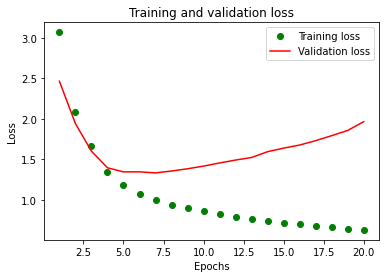

In [44]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "go", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

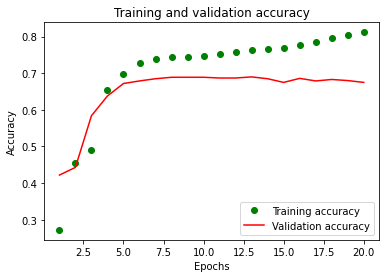

In [45]:
plt.clf()

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "go", label="Training accuracy")
plt.plot(epochs, val_acc, "r", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Further experiments

- Try using larger or smaller layers: 32 units, 128 units, and so on.
- You used two intermediate layers before the final softmax classification layer. Now try using a single intermediate layer, or three intermediate layers.

### Wrapping up

Here’s what you should take away from this example:

- If you’re trying to classify data points among $N$ classes, your model should end with a `Dense` layer of size $N$.
- In a single-label, multiclass classification problem, your model should end with a `softmax` activation so that it will output a **probability distribution** over the $N$ output classes.
- **Categorical crossentropy** is almost always the **loss function** you should use for such problems. It __minimizes the distance between the probability distributions__ output by the model and the true distribution of the targets.
- There are two ways to handle labels in multiclass classification:
   - Encoding the labels via **categorical encoding** (also known as **one-hot encoding**) and using `categorical_crossentropy` as a loss function
   - Encoding the labels as **integers** and using the `sparse_categorical_crossentropy` loss function
- If you need to classify data into a large number of categories, you should avoid creating **information bottlenecks** in your model due to intermediate layers that are too small.